C:\Users\govin\AppData\Local\Temp\ipykernel_25688\3219505104.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax1, data=df, y='age_group', order=df['age_group'].value_counts().index, palette='viridis')
C:\Users\govin\AppData\Local\Temp\ipykernel_25688\3219505104.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax2, data=df, y='income', order=sorted(df['income'].dropna().unique()), palette='plasma')


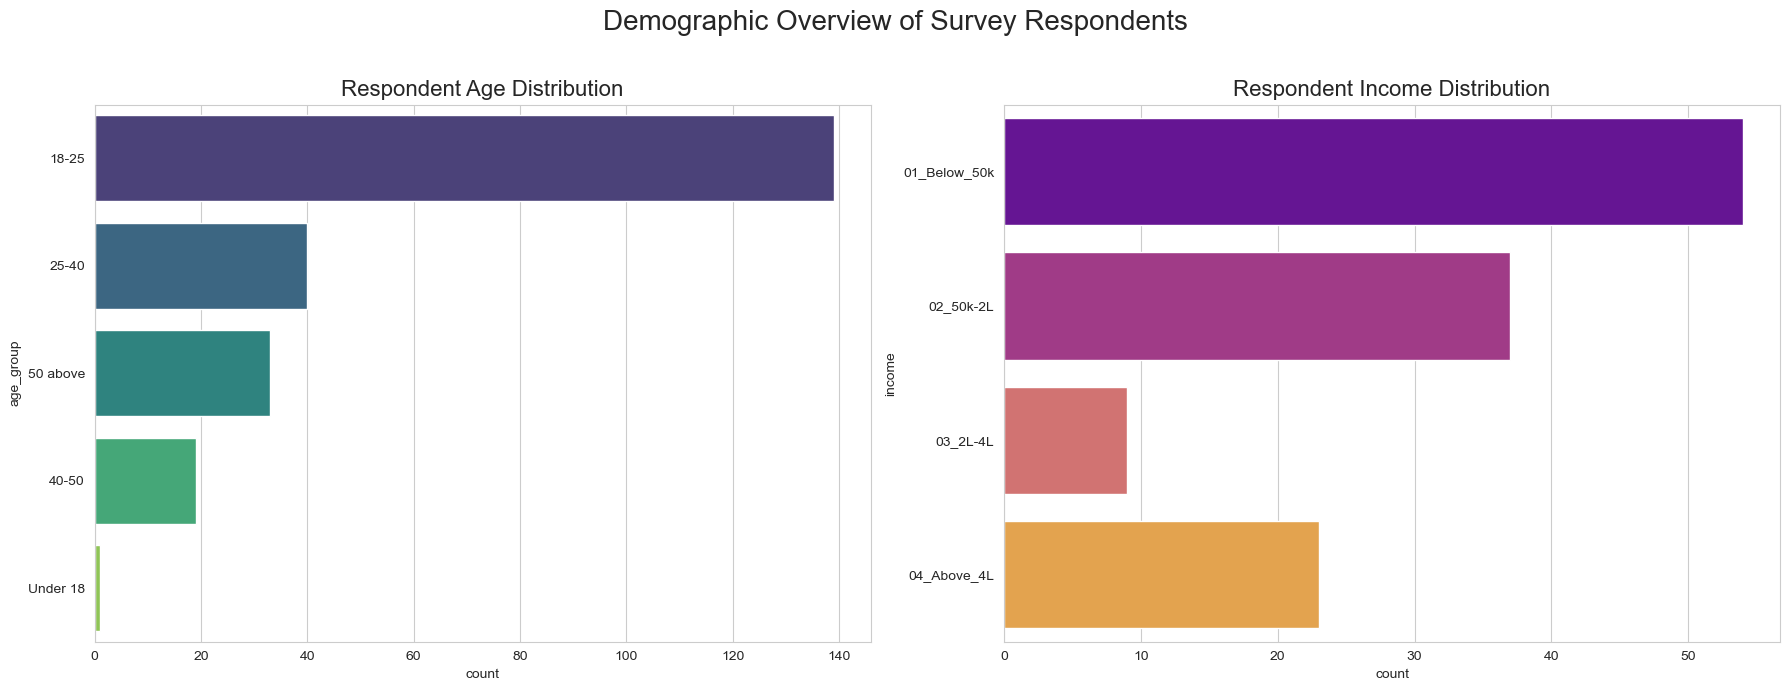

C:\Users\govin\AppData\Local\Temp\ipykernel_25688\3219505104.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax1, data=df, y='reason_no_ev', order=df['reason_no_ev'].value_counts().index, palette='magma')
C:\Users\govin\AppData\Local\Temp\ipykernel_25688\3219505104.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax2, data=df, y='ev_advantage', order=df['ev_advantage'].value_counts().head(5).index, palette='cividis')


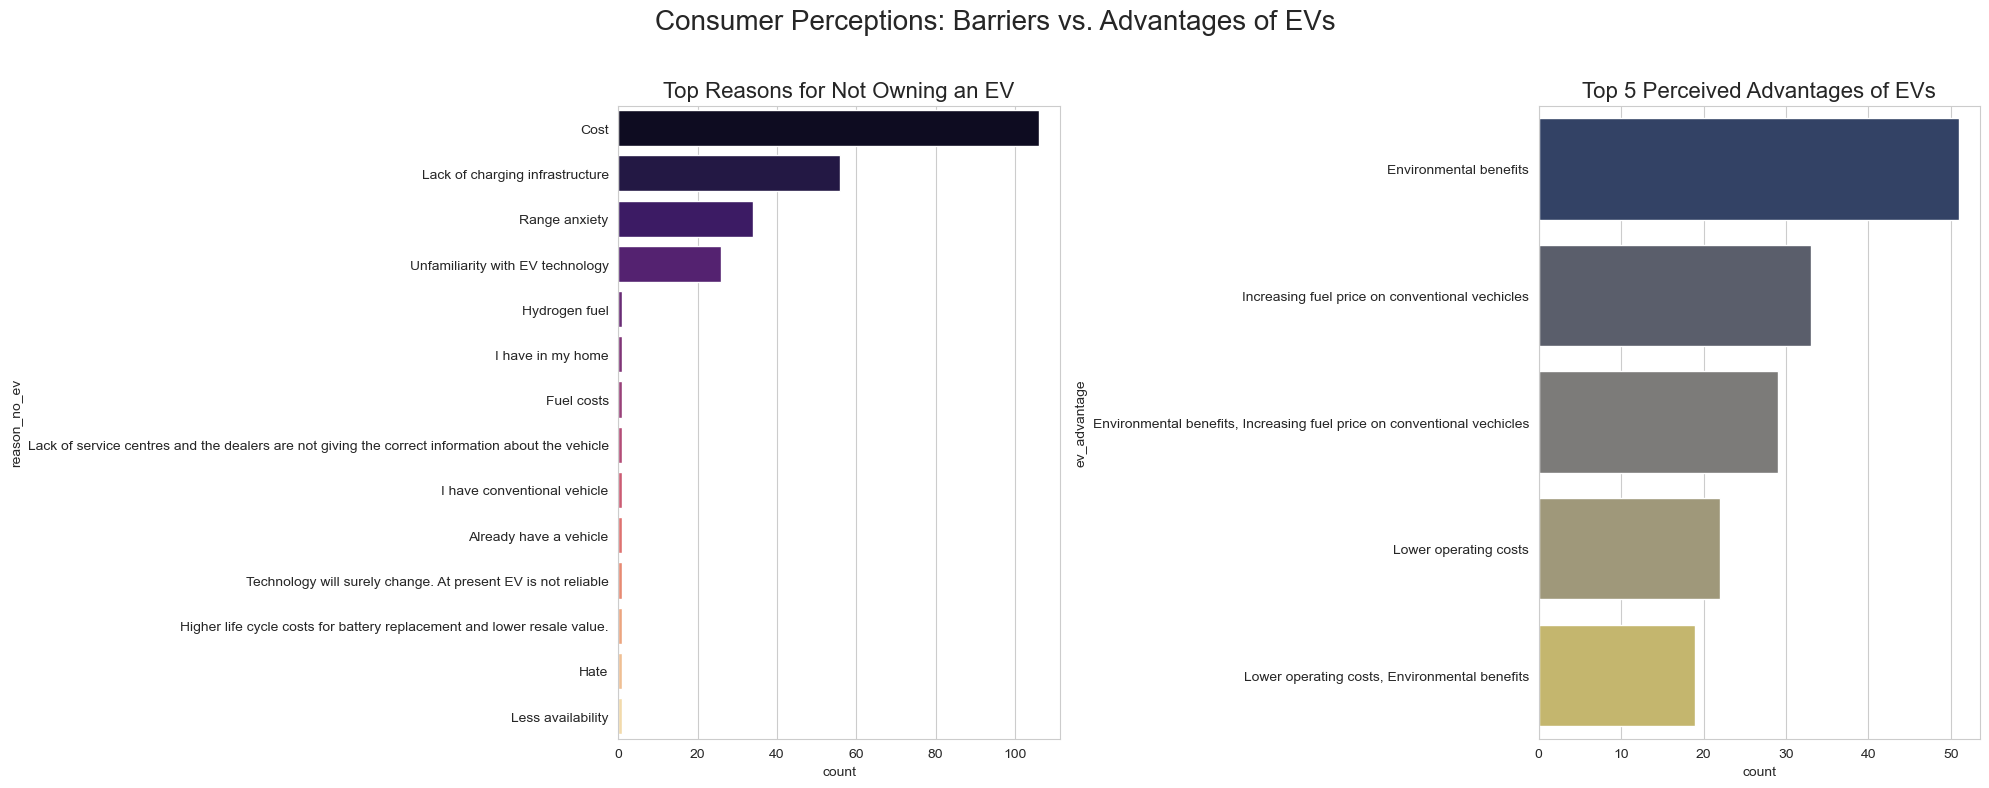


[H1] Does driving an EV affect purchase likelihood?
   P-value: 0.0316
Yes. Those who have driven an EV show a significantly higher likelihood to purchase.

[H2] Does income group affect purchase likelihood?
   P-value: 0.2703
No. The desire to own an EV appears to be independent of income in this dataset.

[H3] Do EV owners spend less weekly on energy than conventional vehicle owners?
   P-value: 0.0002
Yes. There is a significant difference in weekly spending, with EV owners spending less.

[H4] Is there a link between wanting government incentives and wanting more EV options?
   P-value: 0.0000
   Cramer's V (Strength of Association): 0.306
Yes. A significant association exists. Those who want incentives also want more EV models.


In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, mannwhitneyu, kruskal

#Create a list that contains clean column names
column_names = [
    'timestamp', 'email', 'name', 'age_group', 'status', 'income',
    'vehicle_ownership', 'vehicle_type_own', 'vehicle_count',
    'fuel_spend_weekly', 'public_charger_use_freq', 'ev_charge_spend_weekly',
    'use_solar_for_ev', 'env_concern', 'ev_advantage', 'ev_disadvantage',
    'ev_reduces_noise_pollution', 'ev_will_replace_gas', 'reason_no_ev',
    'has_driven_ev', 'wants_more_ev_options', 'purchase_likelihood_5yrs',
    'overall_impression_ev', 'wants_gov_incentives', 'reason_prefer_conventional',
    'quietness_causes_accidents', 'ev_resale_value_opinion', 'mileage_opinion',
    'maintenance_opinion', 'income_influences_purchase'
]

#File path
file_path = 'Statistical Study on  Electrical VS Conventional Vechicles  (Responses).xlsx - Form Responses 1.csv'
df = pd.read_csv(file_path, names=column_names, header=0)

#Standardize income levels for proper sorting
df['income'] = df['income'].replace({
    'Below 50000': '01_Below_50k',
    '50000- 2 lakh': '02_50k-2L',
    '2 lakh-4 lakh': '03_2L-4L',
    'Above 4 lakh': '04_Above_4L'
})

#Create a simple 'owner_type' column
df['owner_type'] = df['vehicle_ownership'].apply(lambda x: 'Electric' if 'Electric' in str(x) else ('Conventional' if 'Conventional' in str(x) else 'None'))

#Convert key columns to the correct data types for analysis
df['purchase_likelihood_5yrs'] = pd.to_numeric(df['purchase_likelihood_5yrs'], errors='coerce')
df['has_driven_ev'] = df['has_driven_ev'].map({'Yes': 1, 'No': 0})

#Map spending ranges to a numeric scale for comparison.
spending_map = {'Less than Rs 100': 1, '100-500': 2, '500-1000': 3, 'Above 1000': 4,'0-50': 1, '50-100': 2, '100-200': 3, '200 above': 4}
df['fuel_spend_rank'] = df['fuel_spend_weekly'].map(spending_map)
df['ev_spend_rank'] = df['ev_charge_spend_weekly'].map(spending_map)

#Remove rows with no answer for our main target variable.
df.dropna(subset=['purchase_likelihood_5yrs'], inplace=True)

#Plotting: Age and Income
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Demographic Overview of Survey Respondents', fontsize=20)
sns.countplot(ax=ax1, data=df, y='age_group', order=df['age_group'].value_counts().index, palette='viridis')
ax1.set_title('Respondent Age Distribution', fontsize=16)
sns.countplot(ax=ax2, data=df, y='income', order=sorted(df['income'].dropna().unique()), palette='plasma')
ax2.set_title('Respondent Income Distribution', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#Plotting: Barriers and Advantages
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Consumer Perceptions: Barriers vs. Advantages of EVs', fontsize=20)
df['reason_no_ev'] = df['reason_no_ev'].apply(lambda x: str(x).split(',')[0].strip())
sns.countplot(ax=ax1, data=df, y='reason_no_ev', order=df['reason_no_ev'].value_counts().index, palette='magma')
ax1.set_title('Top Reasons for Not Owning an EV', fontsize=16)
sns.countplot(ax=ax2, data=df, y='ev_advantage', order=df['ev_advantage'].value_counts().head(5).index, palette='cividis')
ax2.set_title('Top 5 Perceived Advantages of EVs', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#Hypothesis Testing

#H1: Test Drive Impact
print("\n[H1] Does driving an EV affect purchase likelihood?")
group_driven = df[df['has_driven_ev'] == 1]['purchase_likelihood_5yrs']
group_not_driven = df[df['has_driven_ev'] == 0]['purchase_likelihood_5yrs']
u_stat, p_value_h1 = mannwhitneyu(group_driven, group_not_driven, alternative='greater')
print(f"   P-value: {p_value_h1:.4f}")
if p_value_h1 < 0.05:
    print("Yes. Those who have driven an EV show a significantly higher likelihood to purchase.")
else:
    print("No significant difference found.")

#Create the annotated boxplot for H1 after the test has been run
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=df, x='has_driven_ev', y='purchase_likelihood_5yrs', palette='pastel')
# plt.title('Purchase Likelihood: Driven EV vs. Not Driven EV', fontsize=16)
# plt.xlabel('Has Driven an EV? (0 = No, 1 = Yes)')
# plt.ylabel('Purchase Likelihood Score (1-5)')
# p_value_text = f"p-value = {p_value_h1:.4f}"
# plt.text(0.5, 4.5, p_value_text, ha='center', va='center', fontsize=14,bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))
# mean_driven = group_driven.mean()
# mean_not_driven = group_not_driven.mean()
# plt.text(1, mean_driven + 0.1, f'Mean: {mean_driven:.2f}', ha='center', color='blue', weight='bold')
# plt.text(0, mean_not_driven + 0.1, f'Mean: {mean_not_driven:.2f}', ha='center', color='orange', weight='bold')
# plt.show()

#H2: Income's Role
print("\n[H2] Does income group affect purchase likelihood?")
income_groups = [df['purchase_likelihood_5yrs'][df['income'] == group].dropna() for group in sorted(df['income'].dropna().unique())]
h_stat, p_value_h2 = kruskal(*income_groups)
print(f"   P-value: {p_value_h2:.4f}")
if p_value_h2 < 0.05:
    print("Yes. Income has a significant effect on the likelihood to purchase an EV.")
else:
    print("No. The desire to own an EV appears to be independent of income in this dataset.")

#H3: Weekly Spending Comparison
print("\n[H3] Do EV owners spend less weekly on energy than conventional vehicle owners?")
conv_spending = df[df['owner_type'] == 'Conventional']['fuel_spend_rank'].dropna()
ev_spending = df[df['owner_type'] == 'Electric']['ev_spend_rank'].dropna()
u_stat, p_value_h3 = mannwhitneyu(conv_spending, ev_spending, alternative='two-sided')
print(f"   P-value: {p_value_h3:.4f}")
if p_value_h3 < 0.05:
    print("Yes. There is a significant difference in weekly spending, with EV owners spending less.")
else:
    print("No significant difference in spending was detected.")

#H4: Government Incentives and Market Demand
print("\n[H4] Is there a link between wanting government incentives and wanting more EV options?")
contingency_table = pd.crosstab(df['wants_gov_incentives'], df['wants_more_ev_options'])
chi2, p_value_h4, dof, expected = chi2_contingency(contingency_table)
#Calculate Cramer's V for effect size
n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
print(f"   P-value: {p_value_h4:.4f}")
print(f"   Cramer's V (Strength of Association): {cramers_v:.3f}")
if p_value_h4 < 0.05:
    print("Yes. A significant association exists. Those who want incentives also want more EV models.")
else:
    print("No significant association found.")